# Problem set 7
### Group14：
Qi Chen<br/>Besar Vatoci<br/>Jacob Stoltzfus

### The aim of this exercise: compare prediction properties of the linear regression model with a regression tree.


##### Equation for linear model: $$f(X) = β_0 + \sum_{j=i}^{p}{X_jβ_j}$$

##### Equation for tree model: $$f(X) = \sum_{m=1}^{M}c_m\cdot 1_{(X \in R_m)}$$
<font size=0.1>R1,R2 represent different spatial divisions</font>

In [35]:
install.packages("tree")     
library(tree)

Warning message:
"package 'tree' is in use and will not be installed"


# Exercise 1
Consider the following data generating process in which we have n = 100 observations and two covariates
$X_{1} \sim \mathcal{N}(0,4)$ and $X_{2} \sim \mathcal{N}(0,4)$. 
$y_{i}$ is generated by some nonlinear function of $X$ of your choice.

- Generate the data according to the dgp described above and fit a regression tree.
- Use a newly generated test data set to calculate the mean squared error using a naive linear regression
  model and compare with a full tree and an optimally pruned tree.



### How to build a regression tree?
1. Use <font color = blue>recursive binary splitting</font> to grow a large tree on the training data, stopping only when each terminal node has fewer than some minimum number of observations.
2. Apply <font color = blue>cost complexity pruning</font> to the large tree in order to obtain a sequence of best subtrees, as a function of α.
3. Use <font color = blue>K-fold cross-validation</font> to choose α. That is, divide the training observations into K folds. For each k = 1, . . . , K:   <br/>
(a) Repeat Steps 1 and 2 on all but the kth fold of the training data.<br/>
(b) Evaluate the <font color = red>mean squared prediction error</font> on the data in the left-out kth fold, as a function of α.
Average the results for each value of α, and pick α to minimize the average error.
4. <font color = blue>Return</font> the subtree from Step 2 that corresponds to the chosen value of α.


In [26]:
rm(list = ls())
set.seed(2777)

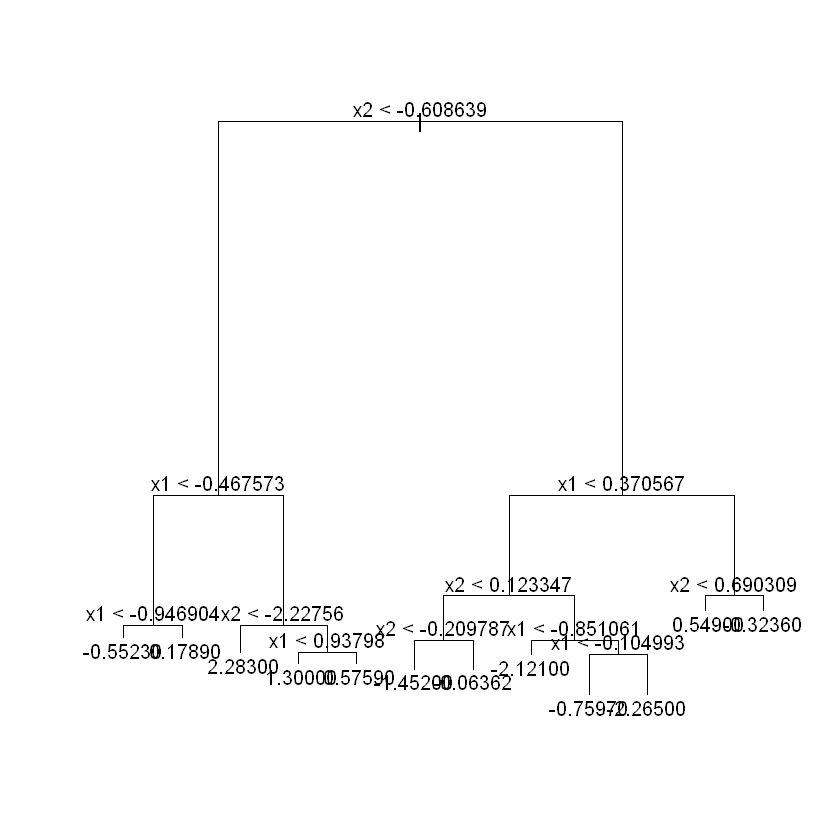

In [27]:
#============Data generating process============#
n <- 100
beta <- c(1, -0.5)
mu <- 0
sigma <- 2

dgp <- function(n, mu, sigma){
  
  x1 <- sin(rnorm(n, mu, sigma))
  x2 <- rnorm(n, mu, sigma)
  X <- cbind(x1, x2)
  eps <- rnorm(n, 0, 1)
  
  y <-  X %*% beta + eps #nonlinear function
  data <- cbind(y, X)
  data <- data.frame("y" = y, "x1" = x1, "x2" = x2)
  
  return(data)
}

#===fitting a regression tree and linear model====#
data_train <- dgp(n, mu, sigma)

fit_tree <- tree(y ~., data = data_train)
fit_lm <- lm(y ~., data = data_train)

plot(fit_tree)
text(fit_tree, pretty = 0)


In [28]:
#============generating a new test dataset========#
data_test <- dgp(n, mu, sigma)

#============predicting===========================#
test_tree <- predict(fit_tree, newdata = data_test)
test_lm <- predict(fit_lm, newdata = data_test)

#============calculating mse======================#
mse_tree <- mean((test_tree - data_test$y) ^ 2)
mse_lm <- mean((test_lm - data_test$y) ^ 2)
mse_tree
mse_lm

[1] 1.658983

[1] 0.9330981

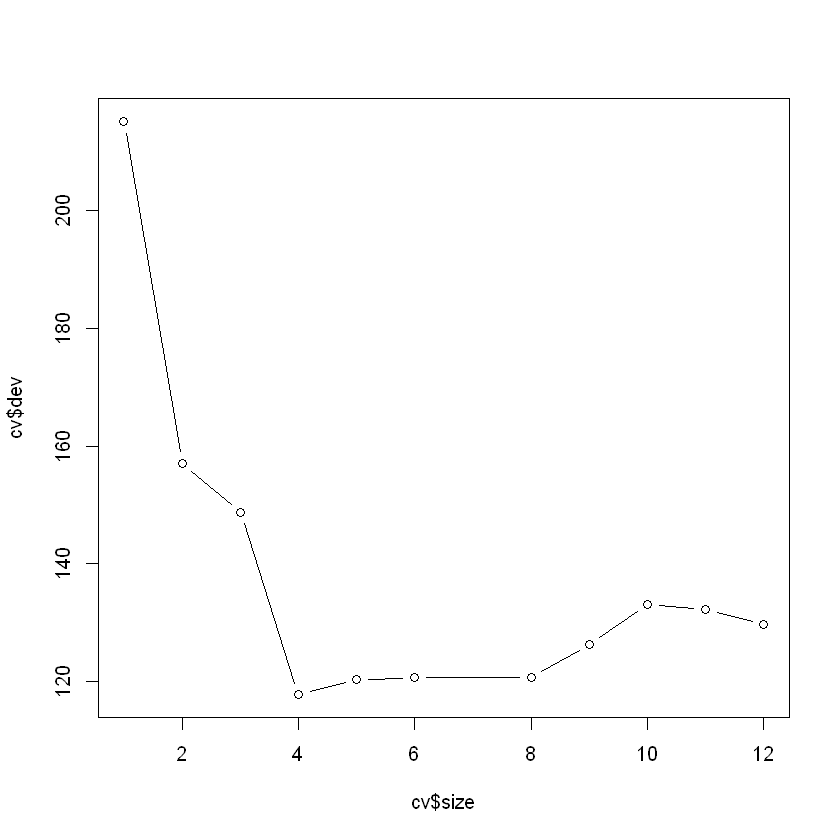

[1] 1.445927

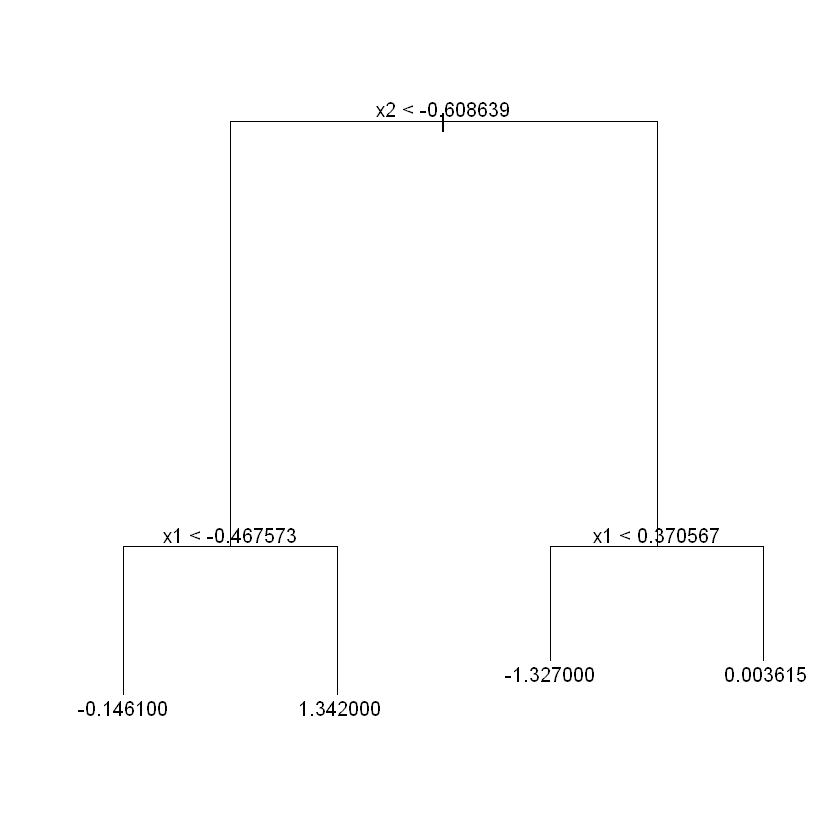

In [34]:
#============pruning the tree=====================#
cv <- cv.tree(fit_tree, K = 10)
plot(cv$size, cv$dev, type = "b")
ptree <- prune.tree(fit_tree, best = 4) 
plot(ptree)
text(ptree, pretty = 0)

test_ptree <- predict(ptree, newdata = data_test)
mse_ptree <- mean((test_ptree - data_test$y) ^ 2)
mse_ptree


In [33]:
min <- mse_lm
if(min > mse_tree){
  min <- mse_tree
} else if(min > mse_ptree){
  min <- mse_ptree
  print(paste("MSE for full tree model is", round(mse_tree, 3),
              ",MSE for linear model is", round(mse_lm , 3),
              ",MSE for pruned tree model is", round(mse_ptree, 3),
              ",in this case pruned tree model performs best"))
} else{
  print(paste("MSE for full tree model is", round(mse_tree, 3),
              ",MSE for linear model is", round(mse_lm , 3),
              ",MSE for pruned tree model is", round(mse_ptree, 3),
              ",in this case linear model performs best"))
}


[1] "MSE for full tree model is 1.659 ,MSE for linear model is 0.933 ,MSE for pruned tree model is 1.446 ,in this case linear model performs best"


### Which model will work better?
- Specific situation, specific analysis